# Final project proposal form

## PHYS 5070, Spring 2021

This form is for description of your plans for the final project this semester.  The final projects have to be (obviously) Python-based coding projects that solve some physics-related problem.  This could be a simulation of an interesting system, programming a microcontroller for your lab, or detailed analysis of some physics data.  

(_Note:_ if you work with data, I want to see more than pure data analysis - some kind of simulation, use of machine learning, etc.  The point is to make sure the project is a test of your overall programming ability; pure statistical analysis is a bit too narrow.)

__Final projects will be submitted as GitHub repositories.__  For team projects in particular, it's important to work in the repository so that I can see individual commits to get an idea of who contributed what code.

If you are working in a team, __only one proposal per team__ is necessary.


## Rubric

All final projects will be graded on the following criteria:

- __Python coding: 40%__

Does the code work as intended?  Are there bugs or edge cases that have not been dealt with?  Does the project demonstrate the ability to use Python to solve problems?

- __Test suite: 20%__

Is there a _clearly-labeled_ Python script or notebook containing tests for the main code base?  Do the tests all pass?  Are the tests non-trivial and comparing to known results (not just code to code?)

- __Documentation: 10%__

Is the code well-documented?  Documentation includes, but is not limited to: descriptive variable names, docstrings for functions, and a README file for the repository.

- __Physics results and presentation: 30%__

Does the project achieve the goals described in the proposal, or at least make significant progress towards them?  Is the presentation clear and understandable, with effective use of plots and descriptive text?

## 1. Project overview

Who are the members of your project team?  (__Maximum of 3__)

Tom Hardin, Bjorn Summer, Owen Tower

Give an overview of your proposed project in a few sentences.  What is the main goal or problem you are trying to solve?

The main goal of our project is to use Machine learning to analyze the behavior of solar flares over the most recent solar cycle. We will be using different machine learning techniques, namely a genetic evolutionary algorithm, to analyze data taken from the NASA GOES15 satellite. Using this technique, we aim to determine to total energy of solar flares of various energies (or sub-classes), and potentially determine the frequency at which certain energy flares occur.

## Example Flare/Analysis from the class Tom and I TA'd for:

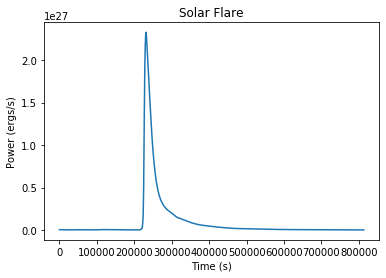

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

solar_data = pd.read_csv('noaa_goes15_xrs_1m_91017.csv')     # Import data using pandas library

##### Calculate to power from solar irradiance #####

# Calculate power in ergs/s. Watch the lecture video if you need help with this.
w2erg = 10**7 # Conversion factors from watts to ergs
int_m2 = 4*np.pi*(1.496*10**11)**2 # area to integrate over
solar_data['longwave (W/m^2)'] = solar_data['longwave (W/m^2)']*w2erg*int_m2     

# Rename dataframe index 1 -- we wrote this for you, no need to edit this code
solar_data = solar_data.rename(columns={'longwave (W/m^2)': 'longwave (ergs/s)'}) 


##### Covert time to seconds from milliseconds #####

# Convert miliseconds to seconds
solar_data['time (milliseconds since 1970-01-01)'] = solar_data['time (milliseconds since 1970-01-01)']/100


#### Convert to elasped time from start of OUR data #####
solar_data.iloc[:,0] = solar_data.iloc[:,0]-solar_data.iloc[0,0]
#################################################################

plt.plot(solar_data.iloc[:,0], solar_data.iloc[:,1])  # Plot the solar data
plt.title("Solar Flare")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (s)")

plt.show()


<img src="Powerlaw_alpha.png">

This is a figure from Shibata et. al (2012), and depicts the flare frequencies vs energies for different papers. The slopes (the alpha values) are what we hope to reproduce in this analysis by using ML techniques to accurately identify flares and find the energies of these flares.

## 2. Project details

Aside from standard Python modules (i.e. things that we've seen in this class or other extremely common and/or built-in modules), do you expect your project to have any external dependencies?

(__If yes__, you will be asked to briefly describe these modules as part of your documentation.)

YOUR ANSWER HERE

Will your project require any external datasets?

(__If yes__, what is your plan for accessing the data?  Is it public?  If not, are you allowed to share it with me for grading purposes?)

Yes, the data is public. 

It will be using data from the following link: https://lasp.colorado.edu/space-weather-portal/data?active-range=%5B1425945600000,1426896000000%5D&outer-range=%5B1394409600000,1457481600000%5D&plots=%5B%5D

Tom and I both TA'd the PHY1140 lab that did seperate analysis for individual flares from the most recent solar cycle. So, it'll be really interesting to see if we can get some results that we can compare with the class data. For the class, students analyzed X, C, and M class flares from the most recent solar cycle (2012-2020). They analyzed data from the longwave one minute average from the NASA GOES 15 satellite.

## 3. Overall plan and scope

Keeping in mind that you have until the end of the semester to finish, describe the _scope_ of your project: what are the major steps you plan to complete?  (It's fine to have a project that only finishes part of the overall goal you've laid out, as long as you're clear about what you what to complete.)

The goals of the project are going to be divided into a few main parts:

### 1) Accurately classify the subclass of flares in the desired datasets using machine learning. The data is given in units of Watts/m^2 and is recorded in units of time (data taken every 60 seconds)


### 2) From here, we will hopefully be able to extract the energy of the flares while sifting out the flares from the noisy, surrounding data.

### 3) Finally, we hope to extract the $\alpha$ value of the power-law slope, which is used to relate the frequency of flares to the energy of each individual flare

__Only if you are working with a team__, give a rough plan for how you intend to divide up the work.  (You don't have to stick to this perfectly, but I want to make sure you think it through.)

YOUR ANSWER HERE:

We plan to really go through each step of the work together. For step 1, we all plan to work together to figure out how to download the data and get it into a form so that it can be fed into the evolutionary algorithm. From there, we plan on breaking up the processing of the data so that the classification and energy of the flares can be extracted. Finally, we all plan to find the alpha values individually and hope to confirm our results by comparing our findings.

All final projects will be submitted using GitHub.  Give a link to your GitHub repository for this project.  (You can change this later by e-mailing me if necessary.)

YOUR ANSWER HERE

https://github.com/OwenTower/PHYS5070_FinalProject/tree/main